### L2 Regularization Visual

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
plt.rcParams['figure.dpi'] = 120

torch.manual_seed(237)

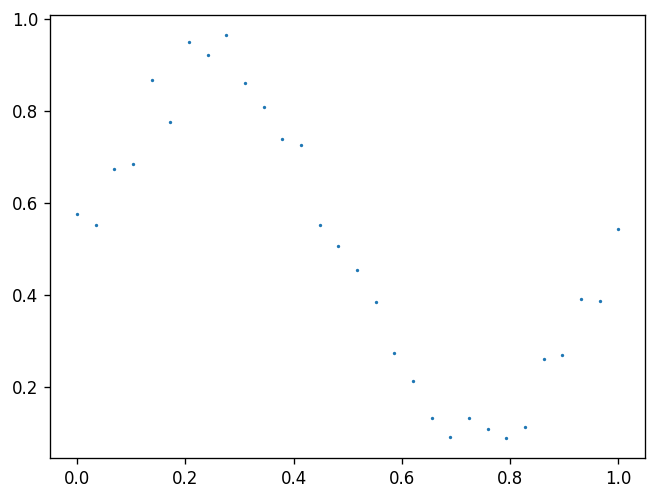

In [3]:
x = torch.linspace(0, 1, 30)
y = .5 + .4*torch.sin(2*np.pi*x) + torch.randn(x.size()) * .05

plt.scatter(x.numpy(), y.numpy(), label = 'Data', s=1)

In [4]:
class OverfitNN(torch.nn.Module):
    def __init__(self, dim_h):
        super().__init__()
        self.linear1 = torch.nn.Linear(1, dim_h)
        self.linear2 = torch.nn.Linear(dim_h, 1)

    def forward(self, x):
        return self.linear2(torch.relu(self.linear1(x)))

In [5]:
model = OverfitNN(300)

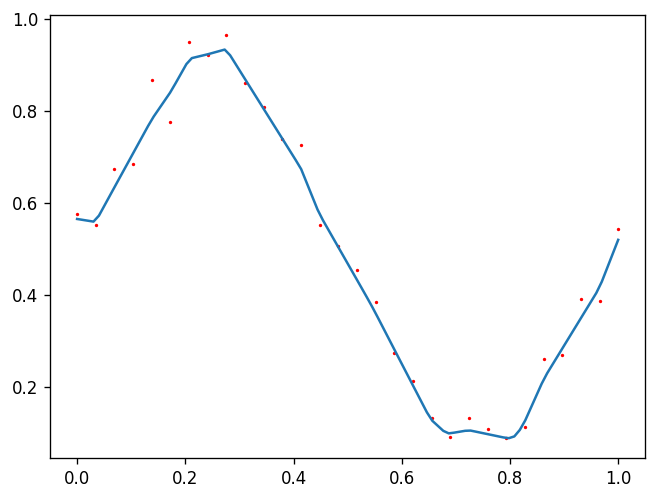

In [6]:
#w/o l2 reg

loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = .01)

for _ in range(10000):
    y_pred = model(x.reshape(-1, 1))
    loss = loss_function(y_pred, y.unsqueeze(1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

x_test = torch.linspace(0, 1, 100).reshape(-1 ,1)
y_test = model(x_test).squeeze()
plt.plot(x_test.numpy(), y_test.detach().numpy())
plt.scatter(x.numpy(), y.numpy(), label = "data", s = 1, c = 'red')

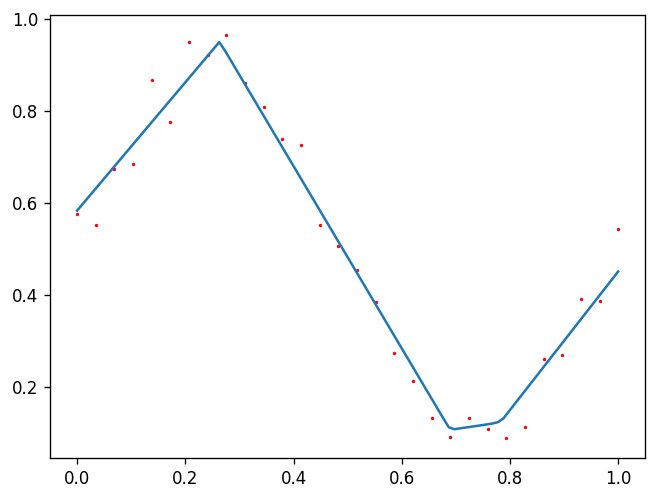

In [7]:
#With l2 reg

loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = .01, weight_decay=.001)

for _ in range(10000):
    y_pred = model(x.reshape(-1, 1))
    loss = loss_function(y_pred, y.unsqueeze(1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

x_test = torch.linspace(0, 1, 100).reshape(-1 ,1)
y_test = model(x_test).squeeze()
plt.plot(x_test.numpy(), y_test.detach().numpy())
plt.scatter(x.numpy(), y.numpy(), label = "data", s = 1, c = 'red')